In [1]:
import re
import pandas as pd
import os
os.chdir("/Users/User/Desktop/machinelearningproject")

# Run this cell to ensure that altair plots show up in the exported HTML
# and that the R cell magic works
import altair as alt

# Save a vega-lite spec and a PNG blob for each plot in the notebook
alt.renderers.enable('mimetype')
# Handle large data sets without embedding them in the notebook
alt.data_transformers.enable('data_server')

DataTransformerRegistry.enable('data_server')

In [2]:
parsed_data = pd.read_csv("data/processed_data/HDFS/HDFS_2k_structured.csv")

In [3]:
parsed_data.head()

,Date,Time,PID,Level,Component,Content,TypeOfContent,datetime_id,Tag
0,2008-11-09,203615,148,INFO,dfs.DataNode$PacketResponder,PacketResponder 1 for block blk_38865049064139...,PacketResponder,81109203615,PacketResponder
1,2008-11-09,203807,222,INFO,dfs.DataNode$PacketResponder,PacketResponder 0 for block blk_-6952295868487...,PacketResponder,81109203807,PacketResponder
2,2008-11-09,204005,35,INFO,dfs.FSNamesystem,BLOCK* NameSystem.addStoredBlock: blockMap upd...,BLOCK*,81109204005,BLOCK*
3,2008-11-09,204015,308,INFO,dfs.DataNode$PacketResponder,PacketResponder 2 for block blk_82291938032499...,PacketResponder,81109204015,PacketResponder
4,2008-11-09,204106,329,INFO,dfs.DataNode$PacketResponder,PacketResponder 2 for block blk_-6670958622368...,PacketResponder,81109204106,PacketResponder


In [31]:
parsed_data.tail()

,Date,Time,PID,Level,Component,Content,TypeOfContent,datetime_id,Tag
1995,2008-11-11,13400,17543,INFO,dfs.DataNode$DataXceiver,10.250.14.38:50010 Served block blk_-867408992...,10.250.14.38:50010,81111013400,Others_IP_INFO
1996,2008-11-11,20752,17598,INFO,dfs.DataNode$DataXceiver,10.251.125.237:50010 Served block blk_-3091349...,10.251.125.237:50010,81111020752,Others_IP_INFO
1997,2008-11-11,22143,17663,INFO,dfs.DataNode$DataXceiver,10.250.13.240:50010 Served block blk_-31342251...,10.250.13.240:50010,81111022143,Others_IP_INFO
1998,2008-11-11,23222,17683,INFO,dfs.DataNode$DataXceiver,10.250.14.143:50010 Served block blk_-66465655...,10.250.14.143:50010,81111023222,Others_IP_INFO
1999,2008-11-11,23914,17773,INFO,dfs.DataNode$DataXceiver,10.251.122.65:50010 Served block blk_286627503...,10.251.122.65:50010,81111023914,Others_IP_INFO


In [4]:
parsed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           2000 non-null   object
 1   Time           2000 non-null   int64 
 2   PID            2000 non-null   int64 
 3   Level          2000 non-null   object
 4   Component      2000 non-null   object
 5   Content        2000 non-null   object
 6   TypeOfContent  2000 non-null   object
 7   datetime_id    2000 non-null   int64 
 8   Tag            2000 non-null   object
dtypes: int64(3), object(6)
memory usage: 140.8+ KB


In [5]:
parsed_data.describe()

,Time,PID,datetime_id
count,2000.000000,2000.000000,2.000000e+03
mean,107375.609500,7771.287500,8.111047e+10
std,69780.904034,9053.587141,5.743542e+05
min,37.000000,13.000000,8.110920e+10
25%,52286.750000,28.000000,8.111010e+10
50%,92538.000000,2883.500000,8.111022e+10
75%,151136.750000,15851.250000,8.111106e+10
max,235951.000000,26895.000000,8.111110e+10


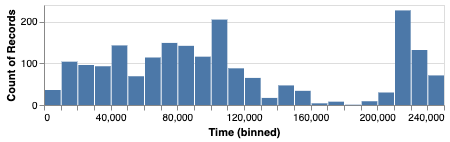

In [6]:
alt.Chart(parsed_data).mark_bar().encode(
    x=alt.X('Time', bin=alt.Bin(maxbins=24)),
    y='count()'
    ).properties(
    height=100
)

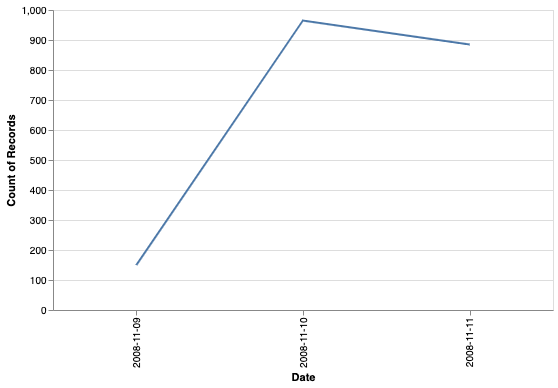

In [11]:
(alt.Chart(parsed_data)
.mark_line().encode(
alt.X('Date'),
    y = 'count()',
).properties(
    height=300, width = 500
))

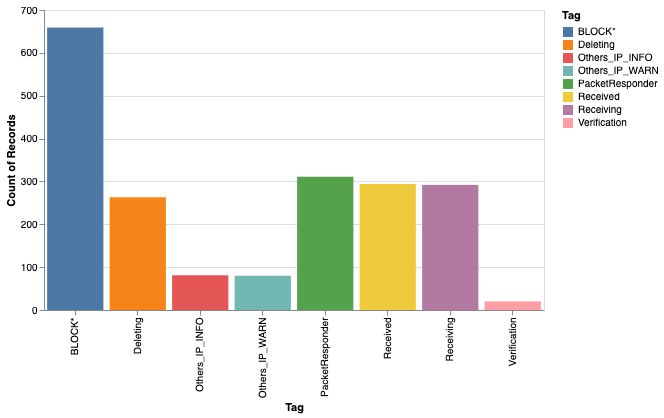

In [41]:
alt.Chart(parsed_data).mark_bar().encode(
    x=alt.X('Tag'),
    y='count()',
    color = "Tag").properties(
    height=300, width = 500
)

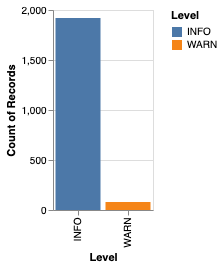

In [29]:
gb = alt.Chart(parsed_data).mark_bar().encode(
    x=alt.X('Level'),
    y = 'count()',
    color = "Level").properties(
    height=200, width = 100
)
gb

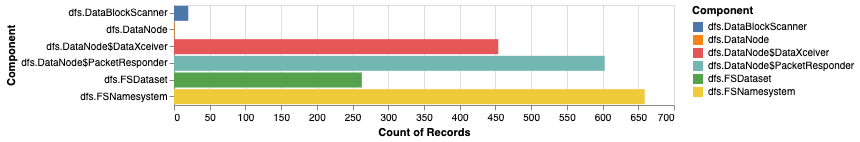

In [26]:
gb = alt.Chart(parsed_data).mark_bar().encode(
    x='count()',
    y = alt.Y('Component'),
    color = "Component").properties(
    height=100, width = 500
)
gb

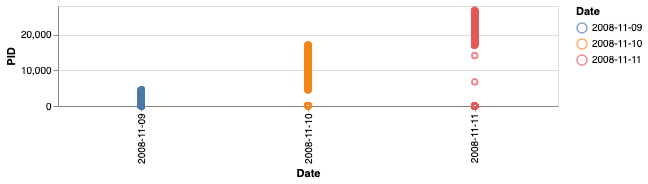

In [33]:
gb = alt.Chart(parsed_data).mark_point().encode(
    x= alt.X('Date'),
    y = alt.Y('PID'),
    color = "Date").properties(
    height=100, width = 500
)
gb

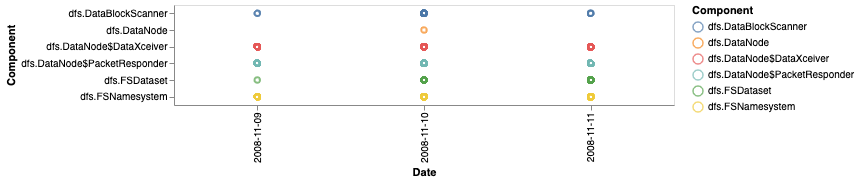

In [40]:
gb = alt.Chart(parsed_data).mark_point().encode(
    x= alt.X('Date'),
    y = alt.Y('Component'),
    color = "Component").properties(
    height=100, width = 500
)
gb